In [313]:
pip install pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 9.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.2 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [425]:
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

### 1

In [376]:
pokedf = pd.read_csv('/Users/alekogeorgiev/Desktop/mopr/Pokemon_full_2.csv', keep_default_na=False, na_values=[""])

cols = list(pokedf.columns)

numeric_cols = cols[1:3] + cols[5:]

pokedf[numeric_cols] = pokedf[numeric_cols].apply(pd.to_numeric)


pokedf

,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,fushigisou,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,None,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,None,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,None,92.0,130.0,115.0,80.0,115.0,138.0


In [377]:
pokedf.dropna(inplace=True)

pokedf

,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,fushigisou,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,None,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,None,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,None,92.0,130.0,115.0,80.0,115.0,138.0


In [378]:
pokedf = pokedf.apply(lambda x: x.astype(str).str.lower())

In [380]:
# CORRECTION OF TYPES

types = (
    'normal',
    'fire',
    'water',
    'fighting',
    'flying',
    'grass',
    'poison',
    'electric',
    'ground',
    'psychic',
    'rock',
    'ice',
    'bug',
    'dragon',
    'ghost',
    'dark',
    'steel',
    'fairy',
    '???',
    'none'
)

def get_type_ratios(value: str):
    return [ SequenceMatcher(None, value, t).ratio() for t in types ]

def correct_type(row: pd.Series, column: str):
    ratios = get_type_ratios(row[column])

    if max(ratios) < 0.5:
        print(f'Could not find type for {row[column]}')
        pokedf.drop(index=index, inplace=True)
        return None

    return types[ratios.index(max(ratios))]

for index, row in pokedf.iterrows():
    for col in ('type', 'secundary type'):
        if row[col] not in types:
            correct = correct_type(row, col)
            if correct is None:
                continue
            row[col] = correct
    
pokedf

,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,fushigisou,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,none,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,none,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,none,92.0,130.0,115.0,80.0,115.0,138.0


In [ ]:
# correct names

In [134]:
pokedf.drop_duplicates(subset=['name'], keep='first', inplace=True)

pokedf

,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,fushigisou,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,None,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,None,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,None,92.0,130.0,115.0,80.0,115.0,138.0


### 2

In [407]:
# FIND MOST COMMON TYPE

type_dict = { t: 0 for t in types }

for col in ('type', 'secundary type'):
    for key, val in pokedf[col].value_counts().items():
        if key != 'none':
            type_dict[key] += val

maxType = max(type_dict, key=type_dict.get)

print ('most common type (both main and secondary) is: ' + maxType)
# FIND MOST COMMON FIRST TYPE

print ('most common main type is: ' + pokedf['type'].mode()[0])

most common type (both main and secondary) is: water
most common main type is: water


In [411]:
# how many pokemon are of type poison
poisonPoke = pokedf['type'].value_counts()['poison'] + pokedf['secundary type'].value_counts()['poison']

print (str(poisonPoke) + ' pokemon have poison as either their first or secondary type')

print (str(pokedf['type'].value_counts()['poison']) + ' pokemon have poison as their main type')

71 pokemon have poison as either their first or secondary type
35 pokemon have poison as their main type


In [422]:
pwarr = pokedf[(pokedf['type'] == 'water') & (pokedf['secundary type'] == 'poison')]
warr = pokedf[(pokedf['type'] == 'water')]

print (str(len(pwarr)/len(warr)) + ' is the chance of a water pokemon being poison type')


0.024390243902439025 is the chance of a water pokemon being poison type


Most common main type is: water


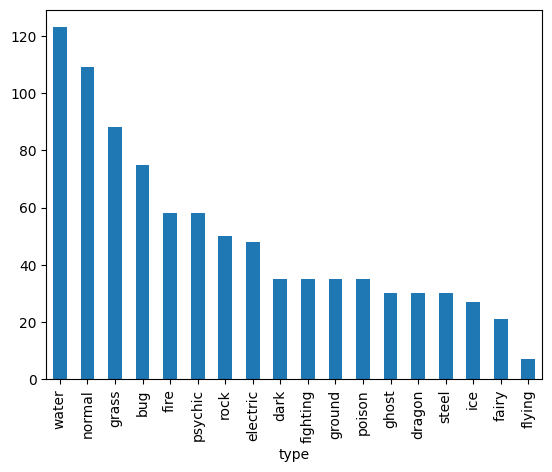

In [443]:
main_types = pokedf['type'].value_counts().plot.bar()
print ('Most common main type is: ' + main_types.index[0])

Most common secondary type is normal


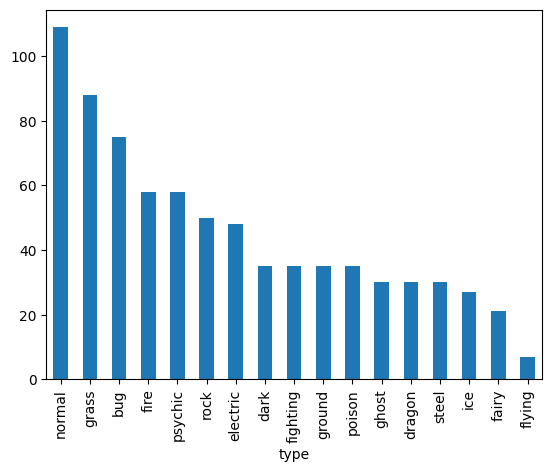

In [448]:
secondary_types = pokedf['type'].value_counts()

# omit the pokemon without a secondary type, as they are the most common
secondary_types = secondary_types.drop(labels=main_types.index[0])

secondary_types.plot.bar()
print ("Most common secondary type is " + secondary_types.index[0])

### 3

In [450]:
meanAtk = pd.to_numeric(pokedf['attack']).mean()

print ("The mean attack value is " + str(meanAtk))

76.26510067114094

In [489]:
cols = list(pokedf.columns)

temp = pokedf[cols[1:3] + cols[5:]]

print(temp.mean())
print(temp.mode())
print(temp.mean() == temp.mode())


height      11.840045
weight     627.761745
hp          68.817673
attack      76.265101
defense     71.832215
sp atk      69.671141
sp def      69.964206
speed       65.680089
dtype: float64
   height  weight    hp  attack  defense  sp atk  sp def  speed
0     6.0    10.0  60.0    60.0     50.0    40.0    50.0   60.0
   height  weight     hp  attack  defense  sp atk  sp def  speed
0   False   False  False   False    False   False   False  False
